# Linear Regression Example

This notebook uses a sampling of data taken from the Buzzfeed news Github repository on the analysis of surveillance planes found [here](https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes)

In [1]:
#get the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read in data
data = pd.read_csv('/mnt/data/demo-notebooks-data/simple_example.csv')

In [3]:
#look at first few rows
data.head()

,speed (x),altitude (y)
0,0,3600
1,11,7450
2,28,4500
3,43,5900
4,47,4700


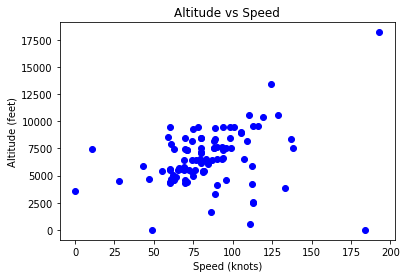

In [4]:
#plot data
fig, ax = plt.subplots()
ax.scatter(data['speed (x)'],data['altitude (y)'], c = 'blue')

#format plot titles
ax.set_title('Altitude vs Speed')
ax.set_xlabel('Speed (knots)')
ax.set_ylabel('Altitude (feet)')

plt.show()

# Our calculated predictions

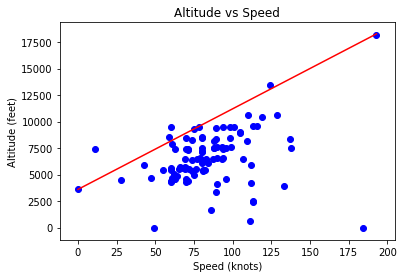

In [5]:
#create line from our calculated model
x = np.linspace(start=0, stop=193, num=100)
y = [(num*76) + 3600 for num in x]

#plot data points and line
fig, ax = plt.subplots()
ax.plot(x, y, c = 'red')
ax.scatter(data['speed (x)'],data['altitude (y)'], c = 'blue')

#format plot titles
ax.set_title('Altitude vs Speed')
ax.set_xlabel('Speed (knots)')
ax.set_ylabel('Altitude (feet)')

plt.show()

In [6]:
#create table of predictions
y_pred = [(num*76) + 3600 for num in data['speed (x)']]
data['our_predicted_y'] = y_pred
data.head()

,speed (x),altitude (y),our_predicted_y
0,0,3600,3600
1,11,7450,4436
2,28,4500,5728
3,43,5900,6868
4,47,4700,7172


In [7]:
#print evaluations metrics
our_MSE = round(mean_squared_error(y, y_pred),0)
our_r2 = round(r2_score(y, y_pred),2)
print('The MSE for the model calculations is ' + str(our_MSE) + ' and R_squared is ' + str(our_r2))

The MSE for the model calculations is 7390299.0 and R_squared is 0.6



# Linear Regression Model

In [8]:
#create the X and y data from our dataset and fit a linear regression model
X = np.array(data['speed (x)']).reshape(-1, 1)
y = np.array(data['altitude (y)']).reshape(-1, 1)
model = LinearRegression().fit(X,y)

In [9]:
#print the slope and intercept that were calculated by the model
slope = round(float(model.coef_), 1)
intercept = int(model.intercept_)

print('The slope of the linear regression model is ' + str(slope) + 
      ' and the intercept is ' + str(intercept))

The slope of the linear regression model is 29.8 and the intercept is 4092


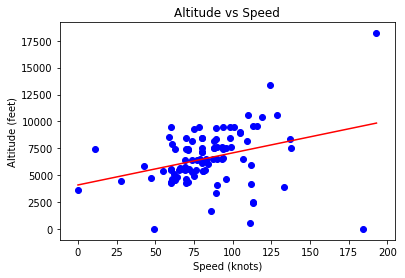

In [10]:
#create a column of the models predictions
data['model_predicted_y'] = data['speed (x)'].apply(lambda x: (slope * x) + intercept)

#create line from calculated model
x = np.linspace(start=0, stop=193, num=100)
y = [(num*slope) + intercept for num in x]

#plot data points and new line
fig, ax = plt.subplots()
ax.plot(x, y, c = 'red')
ax.scatter(data['speed (x)'],data['altitude (y)'], c = 'blue')

#format plot titles
ax.set_title('Altitude vs Speed')
ax.set_xlabel('Speed (knots)')
ax.set_ylabel('Altitude (feet)')

plt.show()

In [11]:
#look at our predicted values
data.head()

,speed (x),altitude (y),our_predicted_y,model_predicted_y
0,0,3600,3600,4092.0
1,11,7450,4436,4419.8
2,28,4500,5728,4926.4
3,43,5900,6868,5373.4
4,47,4700,7172,5492.6


In [12]:
#print evaluations metrics
model_MSE = round(mean_squared_error(y, data['model_predicted_y']),0)
model_r2 = round(r2_score(y, data['model_predicted_y']),2)
print('The MSE for the model calculations is ' + str(model_MSE) + ' and R_squared is ' + str(model_r2))

The MSE for the model calculations is 1136233.0 and R_squared is 0.6
